In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [43]:
def GenerateCounts(Xn,d):
    """
    Code to generate counts of each element from a sequence.
    """
    
    n = len(Xn)
    counts = np.zeros(d)
    for i in range(n):
        counts[Xn[i]-1] += 1
        
    return counts

def GenerateZetas(Xn,d):
    """
    Code to generate the set of zetas from a sequence.
    """
    
    counts = GenerateCounts(Xn,d)
    zetas = []
    for j in range(d):
        if counts[j] not in zetas:
            zetas.append(counts[j])
            
    return zetas

In [44]:
def GenerateNoOfSymbols(Xn,d):
    "Return the number of symbols"

    counts = GenerateCounts(Xn,d)
    zetas = GenerateZetas(Xn,d)
    no_symbols = np.zeros(int(np.max(zetas))+1)
    for zeta in zetas:
        var_phi = 0
        for j in range(d):
            if counts[j]==zeta:
                var_phi+=1
        no_symbols[int(zeta)] = var_phi
    return no_symbols


In [45]:
def acharya_distribution_sample(n):
    """
    Samples from the discrete distribution in Appendix B.11
    Args:
        n: number of samples in the iid sequence
    """
    # Calculate bucket parameters
    log_n = np.log10(n)
    #print(log_n)
    buckets = []
    total_mass = 0.0
    
    # Create probability buckets
    i_min = 1
    i_max = int(np.power(n,1/6))
    #print(i_min,i_max)
    
    for i in range(i_min, i_max + 1):
        # Base probability for this bucket
        base_p = (np.power(n,1/3)*log_n**3)/(1.5*n)+ i * ((np.power(n,1/6)*log_n**3)/(1.5*n))
        #print(base_p)
        # Number of symbols in this bucket
        num_symbols = int(np.sqrt(n)/log_n**3)
        #print(num_symbols)
        # Create two groups of symbols per bucket
        for _ in range(num_symbols):
            # First group: probability base_p
            buckets.append(base_p)
            
            # Second group: probability base_p + i/n
            total_mass += base_p

    # Normalize probabilities
    prob_array = np.array(buckets) / total_mass
    #print(prob_array)
    symbols = np.arange(1,len(prob_array)+1)
    d = len(prob_array)
    # Sample from the distribution
    # while True:
    #     Xn = np.random.choice(symbols, p=prob_array,size=n), len(prob_array)

    #     zetas = GenerateZetas(Xn,d)
    #     zeta_low = n/d 
    #     if np.min(zetas) >= zeta_low:
    #         return Xn,d
    
    return np.random.choice(symbols, p=prob_array,size=n), d, prob_array

In [46]:
def GenerateUniformIID(n,d):
    """
    Generate a uniform sequence over the alphabet of size d.
    """
    # while True:
    #     Xn_iid = np.random.randint(low=1,high=d+1,size=n)
    #     zetas = GenerateZetas(Xn_iid,d)
    #     zeta_low = n/d 
    #     if np.min(zetas) >= zeta_low:
    #         return Xn_iid
    return np.random.randint(low=1,high=d+1,size=n)

def GenerateGeometricDuplicate(Xn_iid, Tmix):
    """
    Generate a random duplicated version of any iid-generated sequence.
    """
    
    Xn = []
    n0 = len(Xn_iid)
    for i in range(n0):
        Dup = np.random.geometric(1/Tmix)
        Xn = Xn + [Xn_iid[i]]*Dup
        
    return Xn

In [47]:
def EmpiricalEstimatorandStationaryMass(Xn,zeta,d,pi):
    """
    Estimate the mass on all elements occurring zeta times on an originally defined uniform distribution.
    """
    n = len(Xn)
    counts = GenerateCounts(Xn,d)
    Mhat = 0
    Mstar = 0
    for j in range(d):
        if counts[j] == zeta:
            Mhat += zeta
            Mstar += pi[j]
            
    Mhat /= n

    return Mhat, Mstar

In [48]:
def EmpiricalEstimatorandStationaryMassUniform(Xn,zeta,d):
    """
    Estimate the mass on all elements occurring zeta times on an originally defined uniform distribution.
    """
    n = len(Xn)
    counts = GenerateCounts(Xn,d)
    Mhat = 0
    Mstar = 0
    for j in range(d):
        if counts[j] == zeta:
            Mhat += zeta
            Mstar += 1
            
    Mhat /= n
    Mstar /= d
    
    
    return Mhat, Mstar

def GTEstimatorandStationaryMassUniform(Xn,zeta,d):
    """
    Estimate the mass on all elements occurring zeta times on an originally defined uniform distribution.
    """
    n = len(Xn)
    counts = GenerateCounts(Xn,d)
    Mhat = 0
    Mstar = 0
    for j in range(d):
        if counts[j] == zeta+1:
            Mhat += (zeta+1)
    for j in range(d):
        if counts[j] == zeta:
            Mstar += 1
            
    Mhat /= n
    Mstar /= d
    
    
    return Mhat, Mstar

In [49]:
def Generate_var_phi(n0,d,Tmix,M):
    #Fix a zeta
    #zeta = Tmix*int(n0/d + np.sqrt(n0/d))
    
    var_phi_iid =0
    for k in range(M):
        #Xn_iid = GenerateUniformIID(n0,d)
        Xn_iid,_,_ = acharya_distribution_sample(n0)
        #Xn = GenerateGeometricDuplicate(Xn_iid,Tmix)
        zetas = GenerateZetas(Xn_iid,d)
        zeta = int(np.median(zetas))
        var_phi = GenerateNoOfSymbols(Xn_iid,d)

        var_phi_iid += var_phi[zeta]
    
    var_phi_iid /= M

    return var_phi_iid

In [50]:
def Generate_max_zeta(n0,d,Tmix,M):
    max_zeta = 0
    for k in range(M):
        Xn_iid = GenerateUniformIID(n0,d)
        Xn = GenerateGeometricDuplicate(Xn_iid,Tmix)
        #Xn_iid,d,pi = acharya_distribution_sample(n=n0)
        zetas = GenerateZetas(Xn,d)
        max_zeta += np.median(zetas)
    
    max_zeta /= M

    return max_zeta

In [51]:
def GenerateNoOfZetas(n0,d,Tmix,M):
    """
    Code to generate number of Zetas.
    """
    
    no_zetas_iid = 0
    no_zetas = 0
    for k in range(M):
        Xn_iid = GenerateUniformIID(n0,d)
        #Xn_iid,d,pi = acharya_distribution_sample(n=n0)
        zetas_iid = GenerateZetas(Xn_iid,d)
        Xn = GenerateGeometricDuplicate(Xn_iid,Tmix)
        zetas = GenerateZetas(Xn,d)
        no_zetas_iid += len(zetas_iid)
        no_zetas += len(zetas)
    no_zetas_iid /= M
    no_zetas /=M
    return no_zetas_iid, no_zetas

In [ ]:
Tmixes = [1]#np.arange(1,20,5)
n0_list = [10000,100000,1000000]
var_phi_zetas = []
for n0 in tqdm(n0_list):
    d = (int)(np.power(n0,2/3))
    M = 50
    for t in tqdm(range(len(Tmixes))):
        Tmix = Tmixes[t]
        var_phi_zeta = Generate_var_phi(n0,d,Tmix,M) 
        var_phi_zetas.append(var_phi_zeta)

100%|██████████| 3/3 [00:10<00:00,  3.35s/it]


C:\Users\milin\AppData\Local\Temp/ipykernel_52984/1165882104.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(n0_list),np.log10(var_phi_zetas),label="No of Symbols")


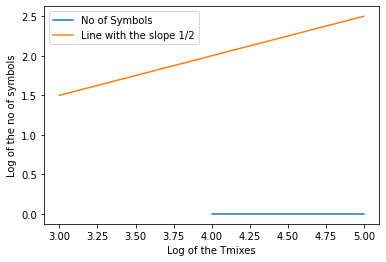

In [53]:
plt.plot(np.log10(n0_list),np.log10(var_phi_zetas),label="No of Symbols")
plt.plot(np.log10(n0_list),(1/2)*np.log10(n0_list),label="Line with the slope 1/2")
plt.ylabel("Log of the no of symbols")
plt.xlabel("Log of the Tmixes")
plt.legend()
#plt.savefig("nVSerror1Tmix1acharyaFixedZeta.pdf")

In [54]:
# Tmixes = np.arange(1,20,4)
# n0_list = [5000]#[100,1000,10000,100000]
# max_zetas_iid = []
# for n0 in tqdm(n0_list):
#     d = (int)(np.power(n0,2/3))
#     M = 100
#     for t in tqdm(range(len(Tmixes))):
#         Tmix = Tmixes[t]
#         max_zeta_iid = Generate_max_zeta(n0,d,Tmix,M)
#         max_zetas_iid.append(max_zeta_iid)

In [55]:
# plt.figure(figsize=(10,6))
# plt.plot(np.log10(Tmixes),np.log10(max_zetas_iid),label="Zetas")
# plt.plot(np.log10(Tmixes),(1)*np.log10(Tmixes)+1,label="Line with the slope 1/3")
# plt.ylabel("Zetas")
# plt.xlabel("Log of n0")
# plt.legend()
# plt.savefig("NoOFZetas.pdf")
# plt.show()

In [56]:
# Tmixes = np.arange(1,20,4)
# #Tmixes = [1]
# n0 = 1000#, 10000, 100000]
# no_zetas_iid = []
# no_zetas = []
# d = (int)(np.power(n0,2/3))
# M = 500
# for t in tqdm(range(len(Tmixes))):
#     Tmix = Tmixes[t]
#     no_zeta_iid, no_zeta = GenerateNoOfZetas(n0,d,Tmix,M) 
#     no_zetas_iid.append(no_zeta_iid)
#     no_zetas.append(no_zeta)

In [57]:
# plt.figure(figsize=(10,6))
# #plt.plot(np.log10(Tmixes),np.log10(no_zetas_iid),label="IID")
# plt.plot(np.log10(Tmixes),np.log10(no_zetas),label="Duplicated")
# plt.plot(np.log10(Tmixes),(1/2)*np.log10(Tmixes)+1.25,label="Line with some slope")
# plt.ylabel("No of Zetas")
# plt.xlabel("Mixing Times")
# plt.legend()
# plt.savefig("NoOFZetas.pdf")
# plt.show()
